In [1]:
import pandas as pd

# Load your data
data = pd.read_csv("combined_data.csv")


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define your custom list of stop words
custom_stop_words = custom_stop_words = ["porsche","trim","popular","honda","2024","dodge","which","but","mazda","buick","mpge","most","volkswagen","nissan","lexus","kia","subaru","hyundai","its","city","the","that","range","rover","chevrolet","wagoneer","jeep","cherokee","ram","bmw","cadillac","highway","drive","wheel","estimated", "and", "is", "in", "on", "with", "for", "to", "it", "as", "at", "an", "of", "by", "this","ford","volvo","mpg","audi","benz","mercedes","toyota","comes","with"]

# Create the TfidfVectorizer with custom stop words
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=custom_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(data["Description"])


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have already vectorized your text data using the tfidf_vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# tfidf_matrix = tfidf_vectorizer.fit_transform(data["Description"])

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)  # Use the vectorized data
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)  # Use the vectorized data
    silhouette_scores.append(silhouette_avg)

best_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for starting from 2 clusters
print(f"Silhouette Score for {best_num_clusters} Clusters: {max(silhouette_scores)}")


Silhouette Score for 8 Clusters: 0.009774504477098819


In [4]:
from sklearn.cluster import KMeans

# Specify the number of clusters (you can adjust this)
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters)
data["Cluster"] = kmeans.fit_predict(tfidf_matrix)
data["Cluster"] = cluster_labels
output_csv_file = "output_data_with_clusters.csv"

# Save the dataset to a CSV file
data.to_csv(output_csv_file, index=False)


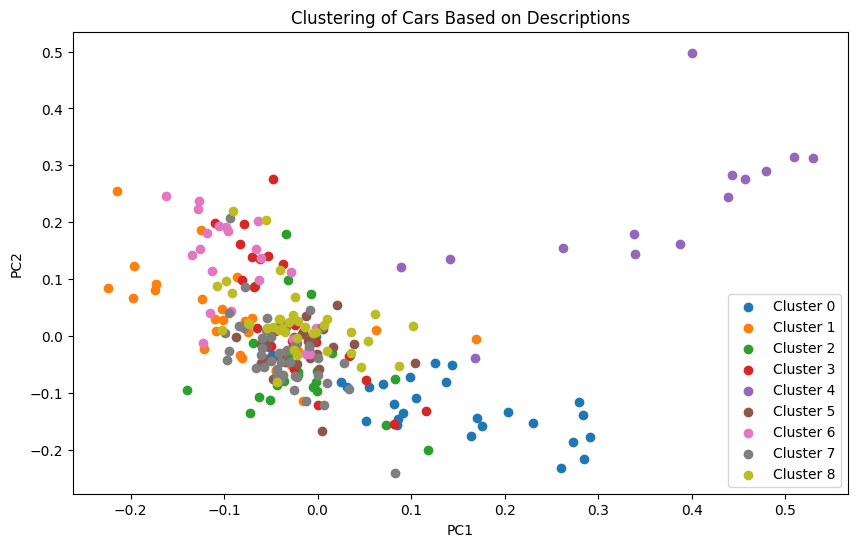

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
reduced_data = pd.DataFrame(reduced_features, columns=["PC1", "PC2"])
reduced_data["Cluster"] = data["Cluster"]

plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(reduced_data[reduced_data["Cluster"] == cluster]["PC1"],
                reduced_data[reduced_data["Cluster"] == cluster]["PC2"],
                label=f'Cluster {cluster}')

plt.legend()
plt.title("Clustering of Cars Based on Descriptions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [6]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


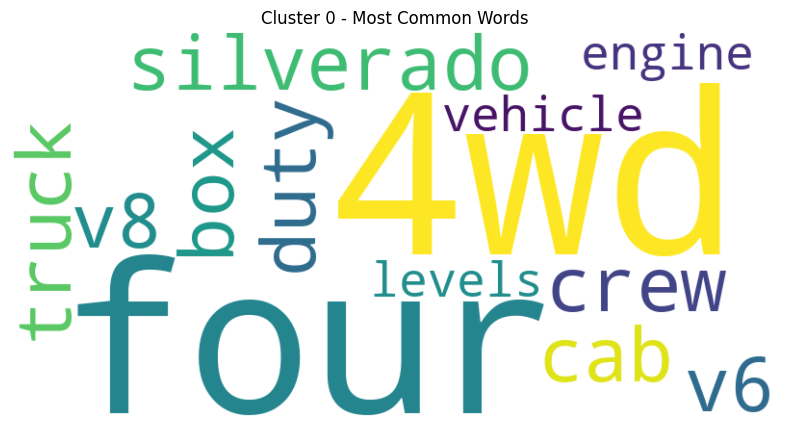

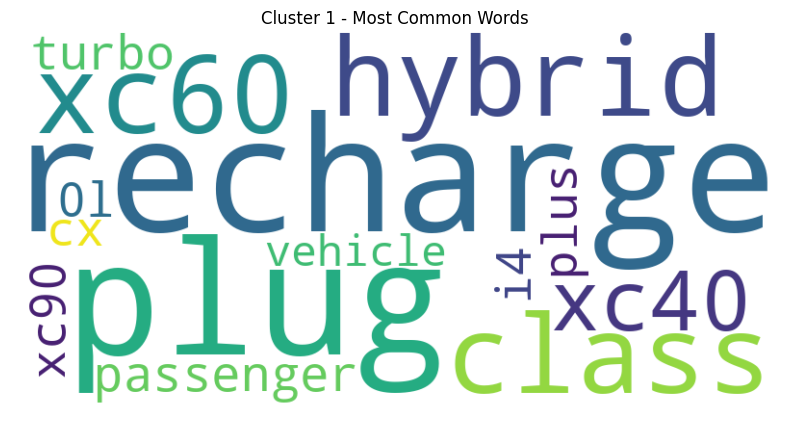

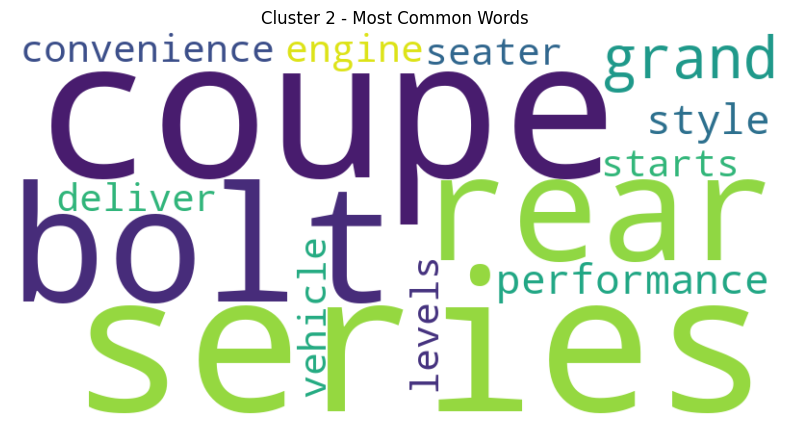

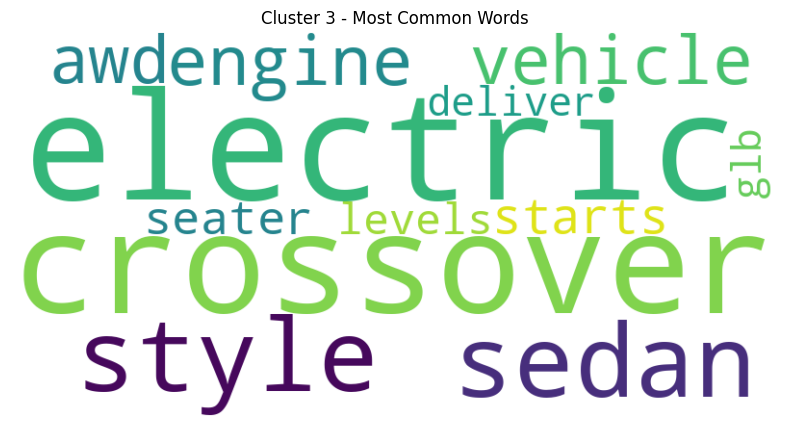

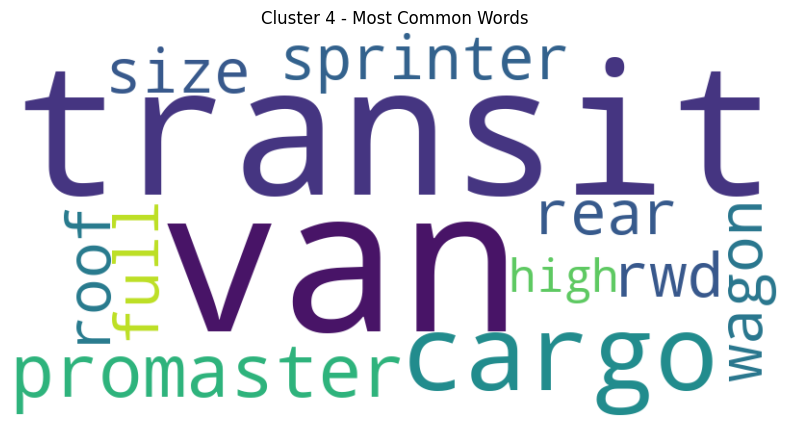

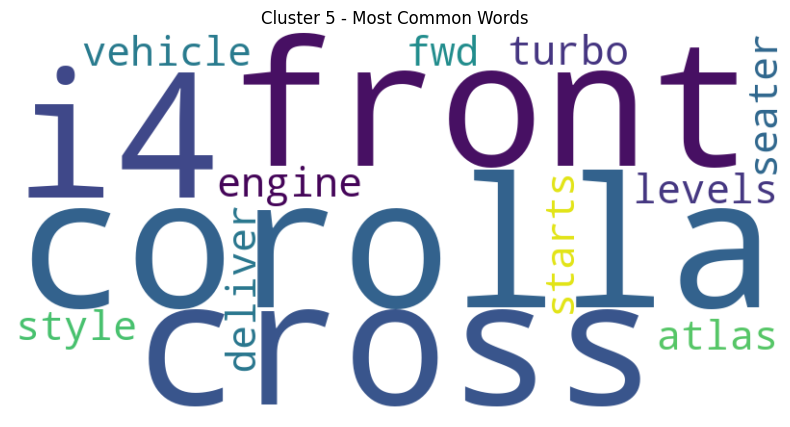

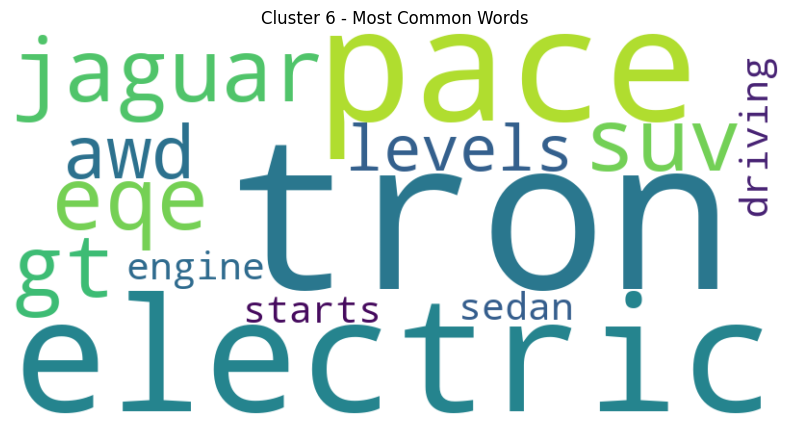

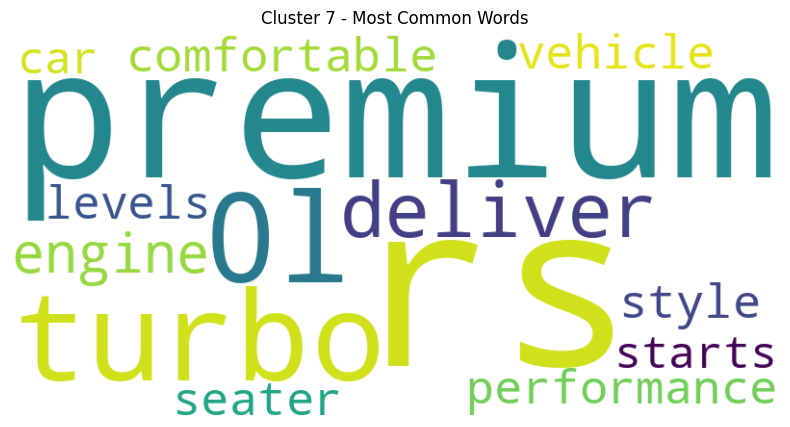

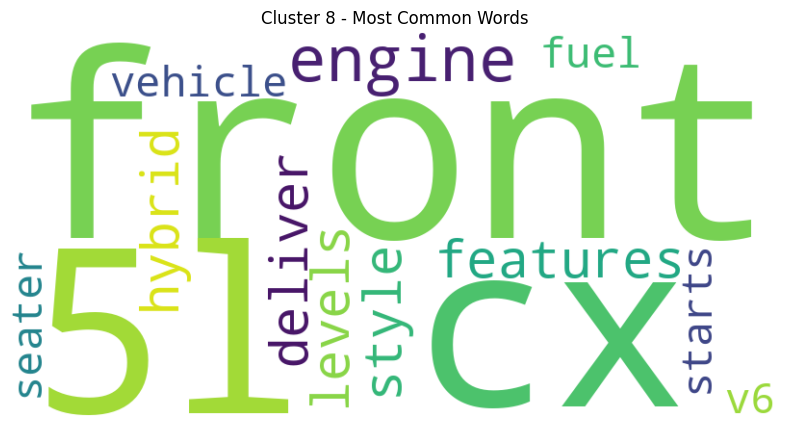

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you already have your clusters in the 'data' DataFrame

# Text preprocessing and vectorization
custom_stop_words = ["porsche","trim","popular","honda","2024","dodge","which","but","mazda","buick","mpge","most","volkswagen","nissan","lexus","kia","subaru","hyundai","the","city","its","that","range","rover","chevrolet","wagoneer","jeep","cherokee","ram","bmw","cadillac","highway","drive","wheel","estimated", "and", "is", "in", "on", "with", "for", "to", "it", "as", "at", "an", "of", "by", "this","ford","volvo","mpg","audi","benz","mercedes","toyota","comes","with"]
tfidf_vectorizer = TfidfVectorizer(max_features=1000,stop_words=custom_stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(data["Description"])

# Finding the most common words in each cluster

# Finding the most common words in each cluster
terms = tfidf_vectorizer.get_feature_names()

# Create word clouds for each cluster
for cluster in range(num_clusters):
    cluster_indices = data[data["Cluster"] == cluster].index
    cluster_tfidf_scores = tfidf_matrix[cluster_indices].mean(axis=0).A1
    top_terms_indices = cluster_tfidf_scores.argsort()[-15:][::-1]
    top_terms = [terms[i] for i in top_terms_indices]

    # Convert the top terms into a string
    wordcloud_text = " ".join(top_terms)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Cluster {cluster} - Most Common Words")
    plt.axis("off")
    plt.show()

In [8]:
import pandas as pd

# Load your data from "combined_data.csv"
data = pd.read_csv("combined_data.csv")

# Remove the "$" and commas and convert to float
data['MSRP Price'] = data['MSRP Price'].str.replace('$', '').str.replace(',', '').astype(float)
data['Starting Market Average'] = data['Starting Market Average'].str.replace('$', '').str.replace(',', '').astype(float)

# Now, the "MSRP" column contains numeric values


In [9]:
from sklearn.metrics import silhouette_score

# Assuming you have already fit your K-Means model to the "MSRP Price" column
cluster_labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(data[["MSRP Price"]], cluster_labels)
# Print the silhouette score
print(f"Silhouette Score for {num_clusters} Clusters: {silhouette_avg:.2f}")


Silhouette Score for 9 Clusters: -0.39


In [10]:

# Specify the number of clusters
num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters)

# Fit the K-Means model to the "MSRP" column
data["MSRP Cluster"] = kmeans.fit_predict(data[["MSRP Price"]])

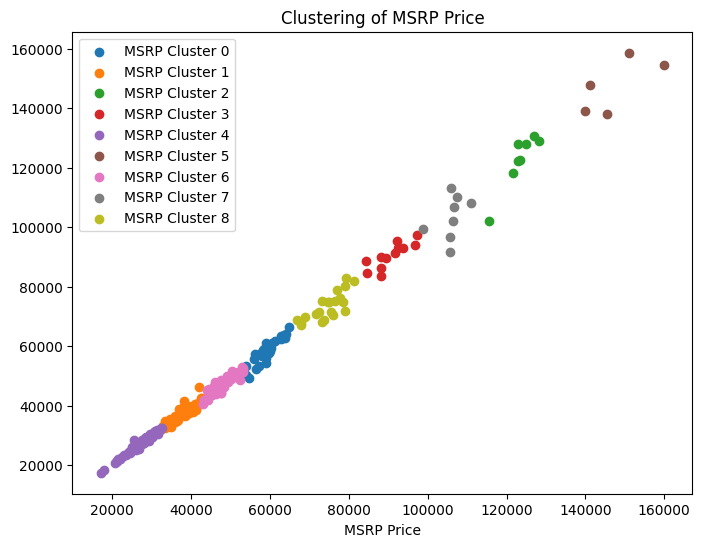

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = data[data["MSRP Cluster"] == i]
    plt.scatter(cluster_data["MSRP Price"], cluster_data["Starting Market Average"], label=f"MSRP Cluster {i}")

plt.xlabel("MSRP Price")
plt.title("Clustering of MSRP Price")
plt.legend()
plt.show()


In [12]:
import pandas as pd

# Assuming you have already fitted your K-Means model to the "MSRP Price" column and stored the labels in 'MSRP Cluster'

# Add "MSRP Cluster" as a new column in your DataFrame
data["msrp_cluster"] = data["MSRP Cluster"]

# Save the DataFrame with the added column to a new CSV file
data.to_csv("msrp_clusters.csv", index=False)
